In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import colorsys
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
def nulls_summary_table(data):
    """this function to see precentage of nulls in column"""
    null_values = pd.DataFrame(data.isnull().sum())
    null_values[1] = null_values[0]/len(data)*100
    null_values.columns = ['Nulls Count','Nulls Percentage %']
    print(null_values)
    
nulls_summary_table(df)

                         Nulls Count  Nulls Percentage %
id                                 0                 0.0
diagnosis                          0                 0.0
radius_mean                        0                 0.0
texture_mean                       0                 0.0
perimeter_mean                     0                 0.0
area_mean                          0                 0.0
smoothness_mean                    0                 0.0
compactness_mean                   0                 0.0
concavity_mean                     0                 0.0
concave points_mean                0                 0.0
symmetry_mean                      0                 0.0
fractal_dimension_mean             0                 0.0
radius_se                          0                 0.0
texture_se                         0                 0.0
perimeter_se                       0                 0.0
area_se                            0                 0.0
smoothness_se                  

In [4]:
df = df.drop('Unnamed: 32',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'] = [1 if e == 'M' else 0 for e in df['diagnosis']]
# df['diagnosis'] = df['diagnosis'].map({'M':1, 'B': 0})

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
del df['id']

In [47]:
def showCorrelationOnData(data,*,threshold=None):
    sns.set_theme(style="white")
    corr = data.corr()
    if threshold:
        corr = data.corr()[(data.corr() >= threshold) | (data.corr() <= -threshold)]
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(20, 20))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, \
                cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":12})
    plt.show()

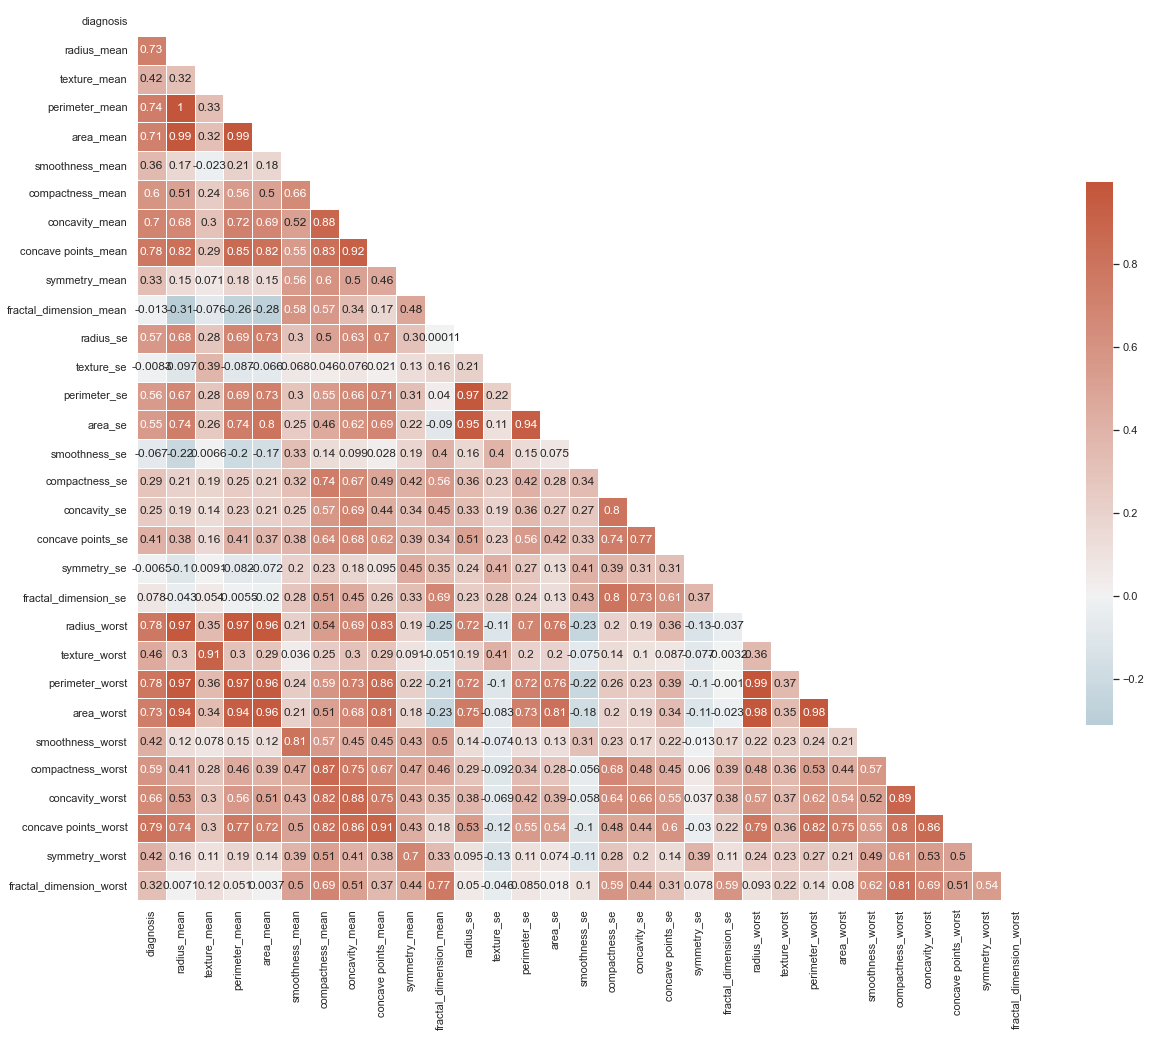

In [49]:
showCorrelationOnData(df)#,threshold=0.75)

In [41]:
def checkImbalancedData(data,columnOfInterset):
    print(data[columnOfInterset].value_counts(normalize=True))

In [42]:
checkImbalancedData(df,'diagnosis')

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


In [50]:
def splitData(data,columnOfinterset,*,normalize = False):
    x = data.drop(columnOfinterset,axis=1).values
    y = data[columnOfinterset].values
    y = y.reshape(-1,1)
    if normalize:
        scaler = MinMaxScaler()
        scaler.fit(x)
        x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)
    return x_train,x_test,y_train,y_test

def checkShape(*args):
    for arg in args:
        print(arg.shape)
        
X_train,X_test,y_train,y_test = splitData(df,'diagnosis',normalize=True)
checkShape(X_train,X_test,y_train,y_test)

(381, 30)
(188, 30)
(381, 1)
(188, 1)


In [51]:
def classificationAnalysis(model,x1,x2,y1,y2):
    def ClassficationMetricsReport(y1,y2,*,kind='test'):
        error_1 = accuracy_score(y1,y2)
        error_2 = f1_score(y1,y2)
        error_3 = precision_score(y1,y2)
        error_4 = recall_score(y1,y2)
        print(f'\t\taccuracy_score({kind}): {100*error_1:0.3f}%')
        print(f'\t\tf1_score({kind}): {100*error_2:0.3f}%')
        print(f'\t\tprecision_score({kind}): {100*error_3:0.3f}%')
        print(f'\t\trecall_score({kind}): {100*error_4:0.3f}%')
    model.fit(x1,y1)
    y1_pred = model.predict(x1)
    y2_pred = model.predict(x2)
    print(f'----{model.__class__.__name__} classification-------\n')
    print('\t----Train Error-------\n')
    ClassficationMetricsReport(y1_pred,y1,kind='train')
    print()
    print('\t----Test Error-------\n')
    ClassficationMetricsReport(y2_pred,y2)
    print()
    print()

In [52]:
knn = KNeighborsClassifier(n_neighbors=7)
reg = LogisticRegression()
dt = DecisionTreeClassifier()
algs = [knn,reg,dt]

In [54]:
reports = []
for alg in algs:
    reports.append(classificationAnalysis(alg,X_train,X_test,y_train,y_test))

----KNeighborsClassifier classification-------

	----Train Error-------

		accuracy_score(train): 97.900%
		f1_score(train): 97.260%
		precision_score(train): 96.599%
		recall_score(train): 97.931%

	----Test Error-------

		accuracy_score(test): 96.277%
		f1_score(test): 94.488%
		precision_score(test): 92.308%
		recall_score(test): 96.774%


----LogisticRegression classification-------

	----Train Error-------

		accuracy_score(train): 95.801%
		f1_score(train): 94.366%
		precision_score(train): 91.156%
		recall_score(train): 97.810%

	----Test Error-------

		accuracy_score(test): 96.809%
		f1_score(test): 95.161%
		precision_score(test): 90.769%
		recall_score(test): 100.000%


----DecisionTreeClassifier classification-------

	----Train Error-------

		accuracy_score(train): 100.000%
		f1_score(train): 100.000%
		precision_score(train): 100.000%
		recall_score(train): 100.000%

	----Test Error-------

		accuracy_score(test): 92.021%
		f1_score(test): 88.189%
		precision_score(test

C:\Users\amira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
def ClassficationMetricsReportd(y1,y2,*,kind='test'):
    error_1 = accuracy_score(y1,y2)
    error_2 = f1_score(y1,y2)
    error_3 = precision_score(y1,y2)
    error_4 = recall_score(y1,y2)
    return {'accuracy_score': 100*error_1,'f1_score': 100*error_2,'precision_score': 100*error_3,'recall_score': 100*error_4}
def classificationAnalysisd(model,x1,x2,y1,y2):
    model.fit(x1,y1)
    y1_pred = model.predict(x1)
    y2_pred = model.predict(x2)
    dictionary_report = {}
    dictionary_report [model.__class__.__name__ + "_Train Error"] = ClassficationMetricsReportd(y1_pred,y1,kind='train')
    dictionary_report [model.__class__.__name__ + "_Test Error"] = ClassficationMetricsReportd(y2_pred,y2)
    return dictionary_report
 

In [98]:
reports_ = []
for alg in algs:
    reports_.append(classificationAnalysisd(alg,X_train,X_test,y_train,y_test))

C:\Users\amira\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


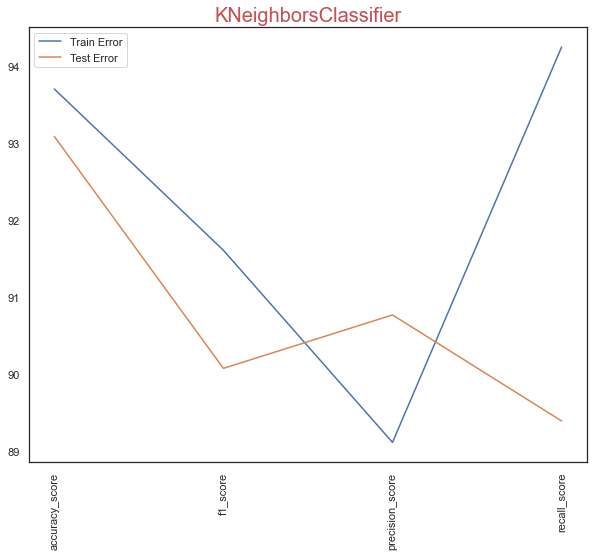

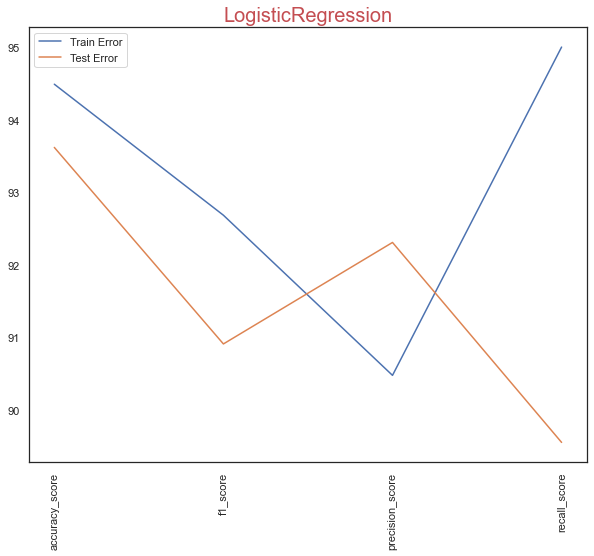

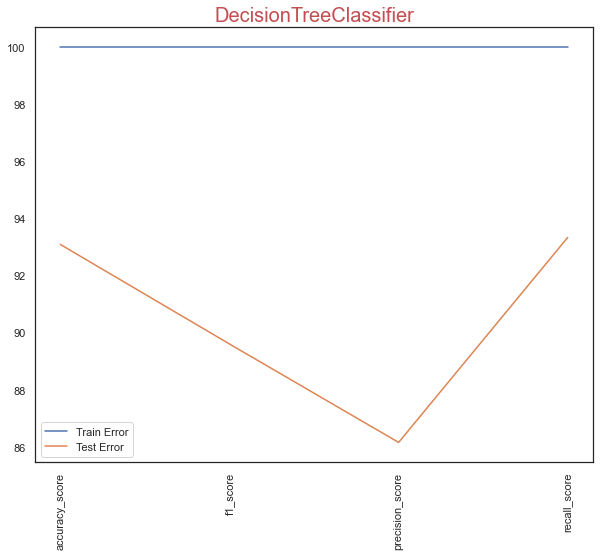

In [97]:
for n in range(len(algs)):
    plt.figure(figsize=(10,8))
    plt.plot(list(reports_[n].values())[0].keys(), list(reports_[n].values())[0].values(),label='Train Error')
    plt.plot(list(reports_[n].values())[1].keys(), list(reports_[n].values())[1].values(),label='Test Error')
    plt.xticks(rotation = 90)
    title = list(reports_[n].keys())[0].split("_")[0]
    plt.title(title,fontdict={'fontsize':20},color='r')
    plt.legend()
    plt.show()